<a href="https://colab.research.google.com/github/juliosdutra/Controle_de_Processos_UFES/blob/main/6.System-stability/Analise_estabilidade.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# $\color{green}{\text{Instalar e importar as bibliotecas.}}$

In [1]:
! pip install -qq control

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 549.6/549.6 kB 5.7 MB/s eta 0:00:00


In [2]:
import numpy as np
import control as ct
import matplotlib.pyplot as plt
import sympy as sp

# $\color{green}{\text{Exemplo: sistema de primeira ordem com tempo-morto.}}$
* também conhecido como FOPDT: "First Order Plus Dead Time".
* função de transferência: $ G(s) = \frac{e^{-0.123s}}{0.1s+1} $


In [3]:
# Aproximação do tempo-morto pode Padé 1/1
theta = 0.123
Gtd = ct. tf(*ct.pade(theta, 1, 1))
Gtd

TransferFunction(array([-1.       , 16.2601626]), array([ 1.       , 16.2601626]))

In [4]:
# Função de transferência FOPDT: primeira ordem em série com tempo-morto
G = ct.tf(1,[0.1,1]) * Gtd
G

TransferFunction(array([-1.       , 16.2601626]), array([ 0.1       ,  2.62601626, 16.2601626 ]))

## *sisotool*

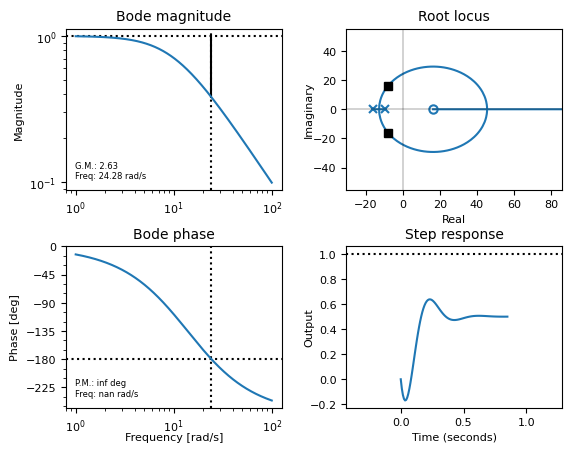

In [5]:
ct.sisotool(G)

## *Bode plot*

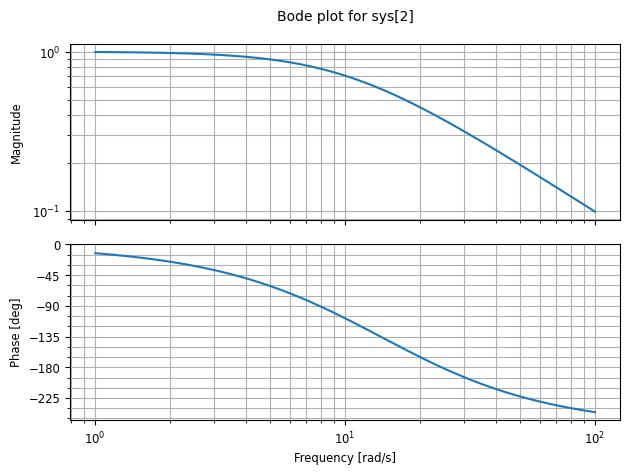

In [15]:
ct.bode_plot(G);

In [11]:
out(mag, phase, omega)

## *root_locus*
Calcula o "lugar das raízes" encontrando as raízes de $1+G_{OL}(s) =0$, sendo $K_c$ modificado para encontrolar o valor das raízes.

In [ ]:
roots, gains = ct.rlocus(G)

## Margens de ganho e de fase

In [ ]:
(gm, pm, wc, wg) = ct.margin(G)
print(f'Margem de ganho: {gm:1.2f}  wc: {wc:1.2f} rad/min')
print(f'Margem de fase: {pm:1.2f}  wg: {wg:1.2f} rad/min')

## Simulação da malha fechada

In [ ]:
# Fechando a malha de controle
Kcm = gm # ganho marginal ou ganho último
Kc = Kcm/2
Gol = Kc*ct.tf(1,[0.1,1])* Gtd
G_servo = ct.minreal( Kc*G/(1 + Kc*G) )

# Teste servo
ts, ys = ct.step_response(G_servo)

# Visualizar
plt.plot(ts,ys, label = 'resposta')
plt.axhline(y=1,linestyle='--', color='r', label='setpoint')
plt.xlabel('Tempo, min')
plt.ylabel('Variável controlada')
plt.legend()
plt.grid()

# $\color{green}{\text{Caso I: controlador P - efeito do tempo-morto.}}$

Vamos encontrar $RA(\omega)$ e $\varphi(\omega)$ para resolver o problema usando método analítico e posteriormente comparar o valores de $\omega_c$, $RA(\omega_c)$ e $MG$ com os resultados fornecidos pela biblioteca *python-control*, considerando diferentes valores para o tempo-morto $\theta=\{0.0, 0.75, 2.0\}$.

Considere o exemplo de uma malha de controle formada por:

* controlador: $ G_c = K_c$, com $K_c=1.0$.

* processo: $ G_p = \frac{2.5 }{(10s+1)(4s+1)}$

* medidor: $  G_m = \frac{e^{-\theta s}}{2s+1}$

Expressões a serem utilizadas:
* Razão de amplitude
$RA(\omega)  = $

* Atraso de fase:
$\varphi(\omega) =  $

Para determinar $\omega_c$, deve-se procurar o valor de frequência na qual $\varphi(\omega)=-\pi.$

### Solução analítica

In [ ]:
from scipy.optimize import fsolve



### Solução via biblioteca *python-control*




### Simulação da malha fechada
considerando teste servo com degrau unitário, $K_c = 0.5K_{cm}$ e $\theta=2$.

# $\color{green}{\text{Caso II: controlador PI - efeito adicional da ação integral.}}$


Considere agora que a malha de controle deve conter um controlador PI, tal que:

* controlador: $ G_c = K_c \bigg( 1+ \frac{1}{\tau_I s}\bigg)$, com  $ K_c=1.0$ e $\tau_I=10.0$.

* processo: $ G_p = \frac{2.5 }{(10s+1)(4s+1)}$

* medidor: $  G_m = \frac{e^{-\theta s}}{2s+1}$